In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [18]:
uber_data  = pd.read_csv("/content/drive/MyDrive/uber.csv")

In [19]:
uber_data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [20]:
print(uber_data.dtypes)

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


In [15]:
uber_data_numeric = uber_data.select_dtypes(include=[float, int])

In [21]:
print("Missing values:\n", uber_data.isnull().sum())

Missing values:
 Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [22]:
uber_data.dropna(inplace=True)

In [23]:
print("Missing values after cleaning:\n", uber_data.isnull().sum())

Missing values after cleaning:
 Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [24]:
uber_data['pickup_datetime'] = pd.to_datetime(uber_data['pickup_datetime'])
uber_data['pickup_day'] = uber_data['pickup_datetime'].dt.day
uber_data['pickup_hour'] = uber_data['pickup_datetime'].dt.hour
uber_data['pickup_day_of_week'] = uber_data['pickup_datetime'].dt.dayofweek

In [25]:
uber_data = uber_data.drop(['pickup_datetime'], axis=1)

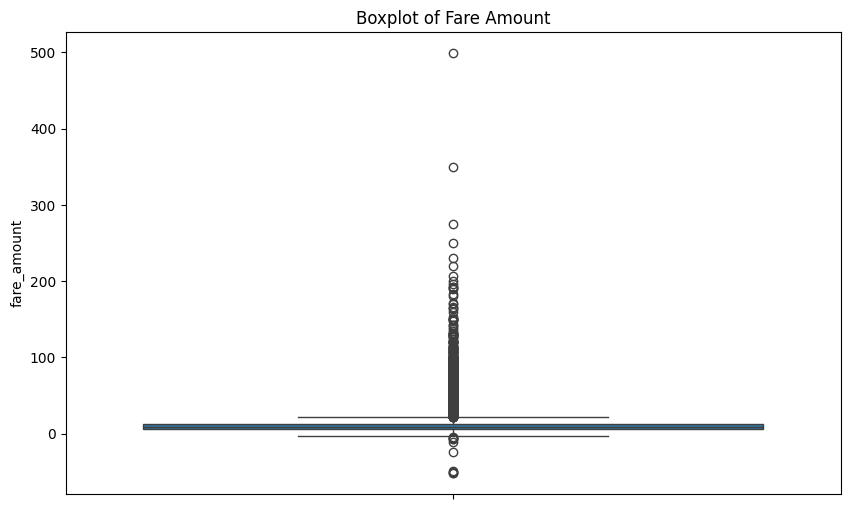

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(uber_data['fare_amount'])
plt.title("Boxplot of Fare Amount")
plt.show()

In [27]:
z_scores = np.abs(stats.zscore(uber_data['fare_amount']))
uber_data = uber_data[(z_scores < 3)]

In [28]:
uber_data_numeric = uber_data.select_dtypes(include=['number'])

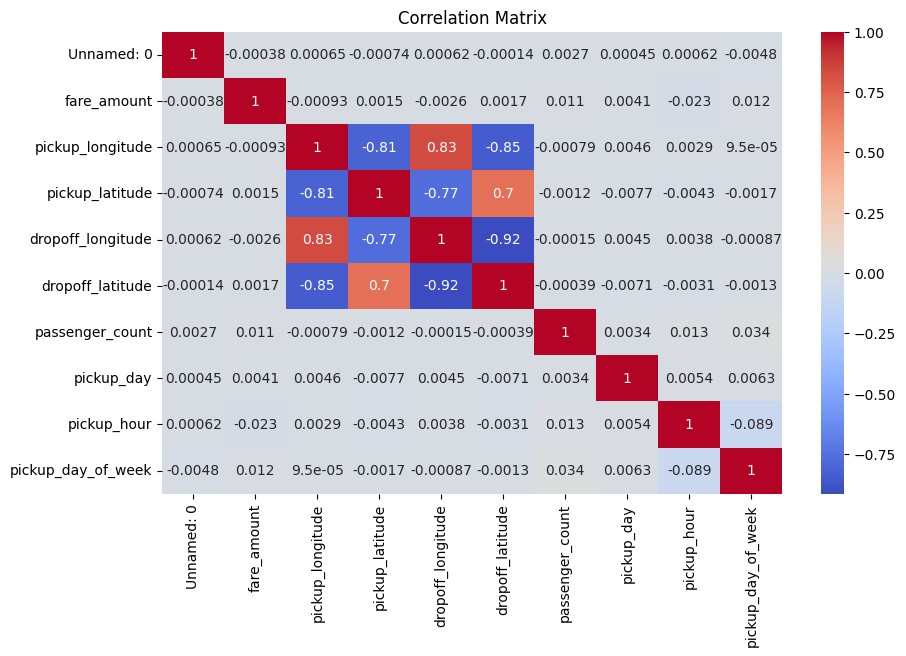

In [29]:
corr_matrix = uber_data_numeric.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [30]:
X = uber_data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'pickup_day', 'pickup_hour', 'pickup_day_of_week']]
y = uber_data['fare_amount']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)

In [34]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)


In [35]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print("RMSE:", rmse)
    print("R^2 Score:", r2)

In [36]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")


Linear Regression Performance:
RMSE: 6.368012012326198
R^2 Score: 0.0009485857611999382


In [37]:
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")


Random Forest Regression Performance:
RMSE: 2.908153574256723
R^2 Score: 0.7916398002203786


In [38]:
results = {
    'Model': ['Linear Regression', 'Random Forest Regression'],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_rf))],
    'R^2 Score': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)]
}

In [39]:
comparison_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
                      Model      RMSE  R^2 Score
0         Linear Regression  6.368012   0.000949
1  Random Forest Regression  2.908154   0.791640
